Check historic data of IBEX35 (index). In order to check interesting dates for future analysis

In [44]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
import numpy as np
import pandas as pd

path=''

In [45]:
# Load the .csv file 
df_ibex = pd.read_csv(f'{path}data/IBEX.csv')
df_ibex = df_ibex[['Date', 'Close']]
df_ibex

,Date,Close
0,2000-01-03,11610.000000
1,2000-01-04,11206.599609
2,2000-01-05,10863.099609
3,2000-01-06,NaN
4,2000-01-07,11102.400391
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [46]:
from datetime import datetime

finish_date_str = '2023-04-01'
start_date_str = '2005-01-01'

# convert date column to datetime format
df_ibex['Date'] = pd.to_datetime(df_ibex['Date'])

finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')

# filter the dataframe to keep rows before and after the filter date 
df_ibex_filter = df_ibex[(df_ibex['Date'] <= finish_date) & (df_ibex['Date'] >= start_date)]

df_ibex_filter
        


,Date,Close
1305,2005-01-03,9124.099609
1306,2005-01-04,9120.000000
1307,2005-01-05,9024.400391
1308,2005-01-06,NaN
1309,2005-01-07,9041.099609
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [47]:
# Checking for missing values
print(df_ibex_filter.isnull().sum())

# Deleting missing values
df_ibex.dropna(subset=['Date', 'Close'], inplace=True)
print(df_ibex_filter.isnull().sum())

# Save it to a new file
df_ibex.to_csv(f'{path}data/IBEX35_clean.csv')

Date     0
Close    9
dtype: int64
Date     0
Close    9
dtype: int64


In [48]:
print(np.shape(df_ibex_filter))
df_ibex_filter

(4662, 2)


,Date,Close
1305,2005-01-03,9124.099609
1306,2005-01-04,9120.000000
1307,2005-01-05,9024.400391
1308,2005-01-06,NaN
1309,2005-01-07,9041.099609
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [49]:
dates = df_ibex_filter['Date']
df_ibex_filter['Date'] = pd.to_datetime(df_ibex_filter['Date'])


/var/folders/rg/221m8nld127_93zldm78zhz00000gn/T/ipykernel_9791/1365172732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ibex_filter['Date'] = pd.to_datetime(df_ibex_filter['Date'])


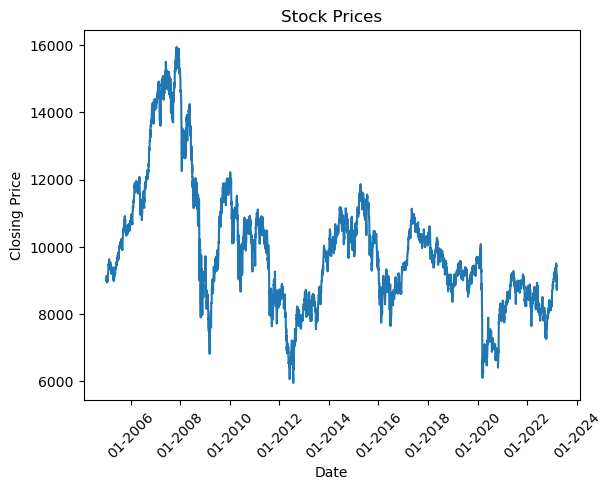

In [50]:
# plot the dataframe
fig, ax = plt.subplots()
ax.plot(df_ibex_filter['Date'], df_ibex_filter['Close'])

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# set the plot title and axis labels
ax.set_title('Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# show the plot
plt.show()